In [59]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [60]:
#load the data matrics
matrix_1st=np.loadtxt('right1st.txt')
print('1 state scenario matrics has the shape:',matrix_1st.shape)
matrix_1st

1 state scenario matrics has the shape: (1439, 7)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [16.,  0.,  0., ...,  0., 10.,  6.],
       [16.,  0.,  0., ...,  0., 11.,  5.],
       [17.,  0.,  0., ...,  0., 12.,  5.]])

In [61]:
str1 = ",".join(str(i) for i in matrix_1st)
str1 = str1.split(",")
str1

['[0. 0. 0. 0. 0. 0. 0.]',
 '[1. 0. 0. 1. 0. 0. 1.]',
 '[1. 0. 0. 1. 0. 1. 0.]',
 '[1. 0. 0. 1. 1. 0. 0.]',
 '[1. 0. 1. 0. 0. 0. 1.]',
 '[1. 0. 1. 0. 1. 0. 0.]',
 '[1. 1. 0. 0. 0. 0. 1.]',
 '[1. 1. 0. 0. 0. 1. 0.]',
 '[1. 1. 0. 0. 1. 0. 0.]',
 '[2. 0. 0. 2. 0. 0. 2.]',
 '[2. 0. 0. 2. 0. 1. 1.]',
 '[2. 0. 0. 2. 0. 2. 0.]',
 '[2. 0. 0. 2. 1. 1. 0.]',
 '[2. 0. 0. 2. 2. 0. 0.]',
 '[2. 0. 1. 1. 0. 0. 2.]',
 '[2. 0. 1. 1. 0. 1. 1.]',
 '[2. 0. 1. 1. 2. 0. 0.]',
 '[2. 1. 0. 1. 0. 0. 2.]',
 '[2. 1. 0. 1. 0. 1. 1.]',
 '[2. 1. 0. 1. 0. 2. 0.]',
 '[2. 1. 0. 1. 1. 0. 1.]',
 '[2. 1. 0. 1. 1. 1. 0.]',
 '[2. 1. 0. 1. 2. 0. 0.]',
 '[2. 1. 1. 0. 0. 0. 2.]',
 '[2. 1. 1. 0. 0. 1. 1.]',
 '[2. 1. 1. 0. 1. 0. 1.]',
 '[2. 1. 1. 0. 1. 1. 0.]',
 '[2. 1. 1. 0. 2. 0. 0.]',
 '[2. 2. 0. 0. 0. 0. 2.]',
 '[2. 2. 0. 0. 0. 1. 1.]',
 '[2. 2. 0. 0. 0. 2. 0.]',
 '[2. 2. 0. 0. 1. 0. 1.]',
 '[2. 2. 0. 0. 1. 1. 0.]',
 '[2. 2. 0. 0. 2. 0. 0.]',
 '[3. 0. 0. 3. 0. 0. 3.]',
 '[3. 0. 0. 3. 0. 1. 2.]',
 '[3. 0. 0. 3. 0. 2. 1.]',
 

In [62]:
sum(matrix_1st[:,0]==matrix_1st[:,4]+matrix_1st[:,5]+matrix_1st[:,6])

1439

# Wight with [231121]

In [63]:
weight = [2,3,1,1,2,1]

In [64]:
matrix1 = matrix_1st[:,1:]
matrix1.shape

(1439, 6)

In [65]:
matrixst1 = matrix1

matrixst1

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       ...,
       [ 0.,  0., 16.,  0., 10.,  6.],
       [ 0.,  0., 16.,  0., 11.,  5.],
       [ 0.,  0., 17.,  0., 12.,  5.]])

In [66]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(matrixst1)
matrix1st = scaler1.transform(matrixst1)
matrix1st[:,0]*=weight[0]
matrix1st[:,1]*=weight[1]
matrix1st[:,2]*=weight[2]
matrix1st[:,3]*=weight[3]
matrix1st[:,4]*=weight[4]
matrix1st[:,5]*=weight[5]
kmeans1 = KMeans(n_clusters=2).fit(matrix1st)
print(len(np.unique(kmeans1.labels_)))
print(kmeans1.labels_)
#matrix1 = np.c_[matrix_1st, kmeans1.labels_]

2
[1 1 1 ... 1 1 1]


In [182]:
matrix1st

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05882353, 0.        , 0.        ,
        0.08333333],
       [0.        , 0.        , 0.05882353, 0.        , 0.15384615,
        0.        ],
       ...,
       [0.        , 0.        , 0.94117647, 0.        , 1.53846154,
        0.5       ],
       [0.        , 0.        , 0.94117647, 0.        , 1.69230769,
        0.41666667],
       [0.        , 0.        , 1.        , 0.        , 1.84615385,
        0.41666667]])

In [183]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
ch1={}
ch2={}
ch3={}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(matrix1st)
    labels = kmeans.labels_
    ch1[k] = metrics.calinski_harabasz_score(matrix1st,labels)
    ch2[k] = metrics.davies_bouldin_score(matrix1st,labels)
    ch3[k] = metrics.silhouette_score(matrix1st,labels,metric='manhattan')
    print(k, ch1[k])
    print(k, ch2[k])
    print(k, ch3[k])

# lists = sorted(ch.items()) # sorted by key, return a list of tuples

# x, y = zip(*lists) # unpack a list of pairs into two tuples

# plt.plot(x, y)

# plt.xlabel('K')
# plt.ylabel('CH Value')
# plt.title('CH Values by K')
# plt.show()

2 1507.5218581475378
2 0.8650956382992627
2 0.4863267627788167
3 1154.446158199114
3 1.1856243830695885
3 0.35345458620102416
4 1009.8413385393667
4 1.0474262364909674
4 0.33491540974792394
5 935.603251405935
5 1.2533736138698728
5 0.2626360318953052
6 876.4815609102764
6 1.2382285411003957
6 0.25723692107904894
7 850.0809226944394
7 1.1322348919536267
7 0.2839859036877122
8 858.6735903943434
8 1.1110760698249973
8 0.2924977850177268
9 826.0149837960488
9 1.0398665683451034
9 0.3021817192344376
10 799.0731124538353
10 1.0788650382146219
10 0.29210696816786863
11 777.1446347343775
11 1.0675371423871935
11 0.287838146691867
12 759.6179340482496
12 1.0943006579252692
12 0.2845347766646111
13 740.8573694933057
13 1.1155073295918845
13 0.2715948783376835
14 722.0037448561571
14 1.1021362871721112
14 0.26703529930804565
15 691.9057593020597
15 1.1117367460582377
15 0.26061344819638516
16 681.4560939103825
16 1.1633421210512433
16 0.2521054821347874
17 665.2243305436075
17 1.1464574772821923


In [184]:
#this is a 2D Visualisation tool
def plot_embedding(X, y, label,title=None):

    plt.figure(figsize=(20, 20))
    ax = plt.subplot(111)
    plt.scatter(X[:,0], X[:,1], c = label)
    for i in range(int(len(X)/20)):   
        plt.text(X[20*i, 0], X[20*i, 1], y[20*i],
                 fontsize=15)
 #plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [10]:
from matplotlib import offsetbox
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity= 300)
X1 = tsne.fit_transform(matrix1st)
# plot
# plt.figure(figsize=(20, 20))
# plt.scatter(X1[:, 0], X1[:, 1], c = kmeans1.labels_)
# plt.show()

In [187]:
# from sklearn.decomposition import PCA
# pca3 = PCA(n_components=2)
# data = pca3.fit_transform(matrix1st)
# from sklearn import metrics
# ch={}
# for k in range(2, 20):
#     kmeans = KMeans(n_clusters=k).fit(matrix1st)
#     labels = kmeans.labels_
#     ch[k] = metrics.calinski_harabaz_score(data,labels)
#     #ch[k] = metrics.davies_bouldin_score(X1,labels)
#     print(k, ch[k])

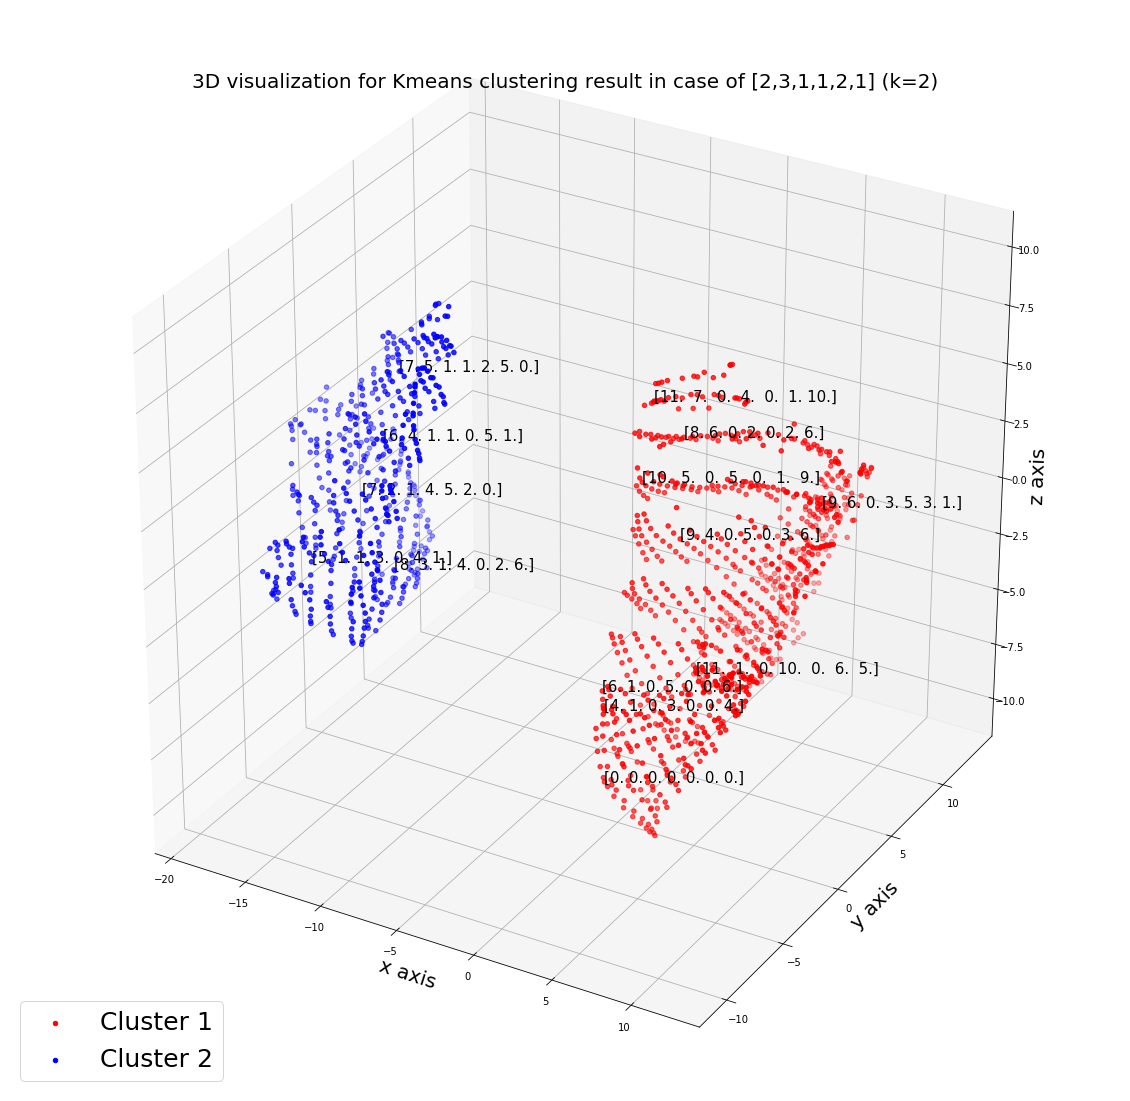

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# tsne = TSNE(n_components = 3)
# data = tsne.fit_transform(matrix1st)
tsne = TSNE(n_components = 3)
data = tsne.fit_transform(matrix1st)
#visualize the results
x = [] 
y = []
z = []
pred = []
x1 = [] 
y1 = []
z1 = []
pred1 = []
x2 = [] 
y2 = []
z2 = []
pred2 = []
x3 = [] 
y3 = []
z3 = []
pred3 = []
x4 = [] 
y4 = []
z4 = []
pred4 = []
for i in range(len(data[:,0])):
    x.append(data[i,0])
    y.append(data[i,1])
    z.append(data[i,2])
    pred.append(kmeans1.labels_[i])
for i in range(len(data[:,0])):
    if kmeans1.labels_[i] == 0:
        x1.append(data[i,0])
        y1.append(data[i,1])
        z1.append(data[i,2])
        pred1.append(kmeans1.labels_[i])
    if kmeans1.labels_[i] == 1:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])
        pred2.append(kmeans1.labels_[i])
    if kmeans1.labels_[i] == 2:
        x3.append(data[i,0])
        y3.append(data[i,1])
        z3.append(data[i,2])
        pred3.append(kmeans1.labels_[i])
    else:
        x4.append(data[i,0])
        y4.append(data[i,1])
        z4.append(data[i,2])
        pred4.append(kmeans1.labels_[i])
# for i in range(len(data[:,0])):
#     if kmeans1.labels_[i] == 0:
#         label1.append((data[i,0]data[i,1]data[i,2]))

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c = 'red',label = 'Cluster 1')
ax.scatter(x2, y2, z2, c = 'blue',label = 'Cluster 2')
# ax.scatter(x3, y3, z3, c = 'yellow',label = 'Cluster 3')
# ax.scatter(x4, y4, z4, c = 'green',label = 'Cluster 4')
for i in range(int(len(data)/100)):
    ax.text(x[100*i], y[100*i], z[100*i],str1[100*i],
             fontsize=15)
plt.title("3D visualization for Kmeans clustering result in case of [2,3,1,1,2,1] (k=2)",fontsize = 20)
ax.set_xlabel('x axis',fontsize = 20)
ax.set_ylabel('y axis',fontsize = 20)
ax.set_zlabel('z axis',fontsize = 20)
ax.legend(fontsize = 25,loc=3)
plt.show()

# Weight with [111111]

In [21]:
weight = [1,1,1,1,1,1]

In [22]:
matrix1 = matrix_1st[:,1:]
matrix1.shape
matrix_1st[:,1:]

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       ...,
       [ 0.,  0., 16.,  0., 10.,  6.],
       [ 0.,  0., 16.,  0., 11.,  5.],
       [ 0.,  0., 17.,  0., 12.,  5.]])

In [23]:
matrixst1 = matrix1

matrixst1

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       ...,
       [ 0.,  0., 16.,  0., 10.,  6.],
       [ 0.,  0., 16.,  0., 11.,  5.],
       [ 0.,  0., 17.,  0., 12.,  5.]])

In [24]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(matrixst1)
matrix1st = scaler1.transform(matrixst1)
matrix1st[:,0]*=weight[0]
matrix1st[:,1]*=weight[1]
matrix1st[:,2]*=weight[2]
matrix1st[:,3]*=weight[3]
matrix1st[:,4]*=weight[4]
matrix1st[:,5]*=weight[5]
kmeans2 = KMeans(n_clusters=2).fit(matrix1st)
print(len(np.unique(kmeans2.labels_)))
print(kmeans2.labels_)
#matrix1 = np.c_[matrix_1st, kmeans1.labels_]

2
[0 0 0 ... 0 0 0]


In [121]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
ch1={}
ch2={}
ch3={}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(matrix1st)
    labels = kmeans.labels_
    ch1[k] = metrics.calinski_harabasz_score(matrix1st,labels)
    ch2[k] = metrics.davies_bouldin_score(matrix1st,labels)
    ch3[k] = metrics.silhouette_score(matrix1st,labels,metric='manhattan')
    print(k, ch1[k])
    print(k, ch2[k])
    print(k, ch3[k])
# lists = sorted(ch.items()) # sorted by key, return a list of tuples

# x, y = zip(*lists) # unpack a list of pairs into two tuples

# plt.plot(x, y)

# plt.xlabel('K')
# plt.ylabel('CH Value')
# plt.title('CH Values by K')
# plt.show()

2 402.7125876235727
2 1.694569059325557
2 0.31291532156358404
3 411.5692870121696
3 1.4914530988109886
3 0.29396537871926437
4 441.75949516692316
4 1.3275312903110206
4 0.2738298012218164
5 437.61043432678105
5 1.2172344142487195
5 0.25902464316920515
6 438.0455304846789
6 1.2084420692759743
6 0.2854570488753373
7 430.9181145608922
7 1.1387677261765448
7 0.2877414747439725
8 427.1892709570645
8 1.1627843010413361
8 0.2875217874860947
9 426.83218256734
9 1.0877833287980057
9 0.2912090341264351
10 418.6561081031185
10 1.1093468830460718
10 0.27843658813274325
11 404.5988781888556
11 1.1241822147971725
11 0.2694486270716216
12 389.12735193092493
12 1.1181861114812208
12 0.26092844797967696
13 377.48887326725526
13 1.1791863096016948
13 0.2569136796696596
14 371.6771490615078
14 1.1929827010411664
14 0.25309979904933283
15 364.4551893723362
15 1.173040922254298
15 0.253094667000822
16 357.5036920001832
16 1.156833994504175
16 0.2528098317310656
17 355.5975440903796
17 1.1096798350025152
17

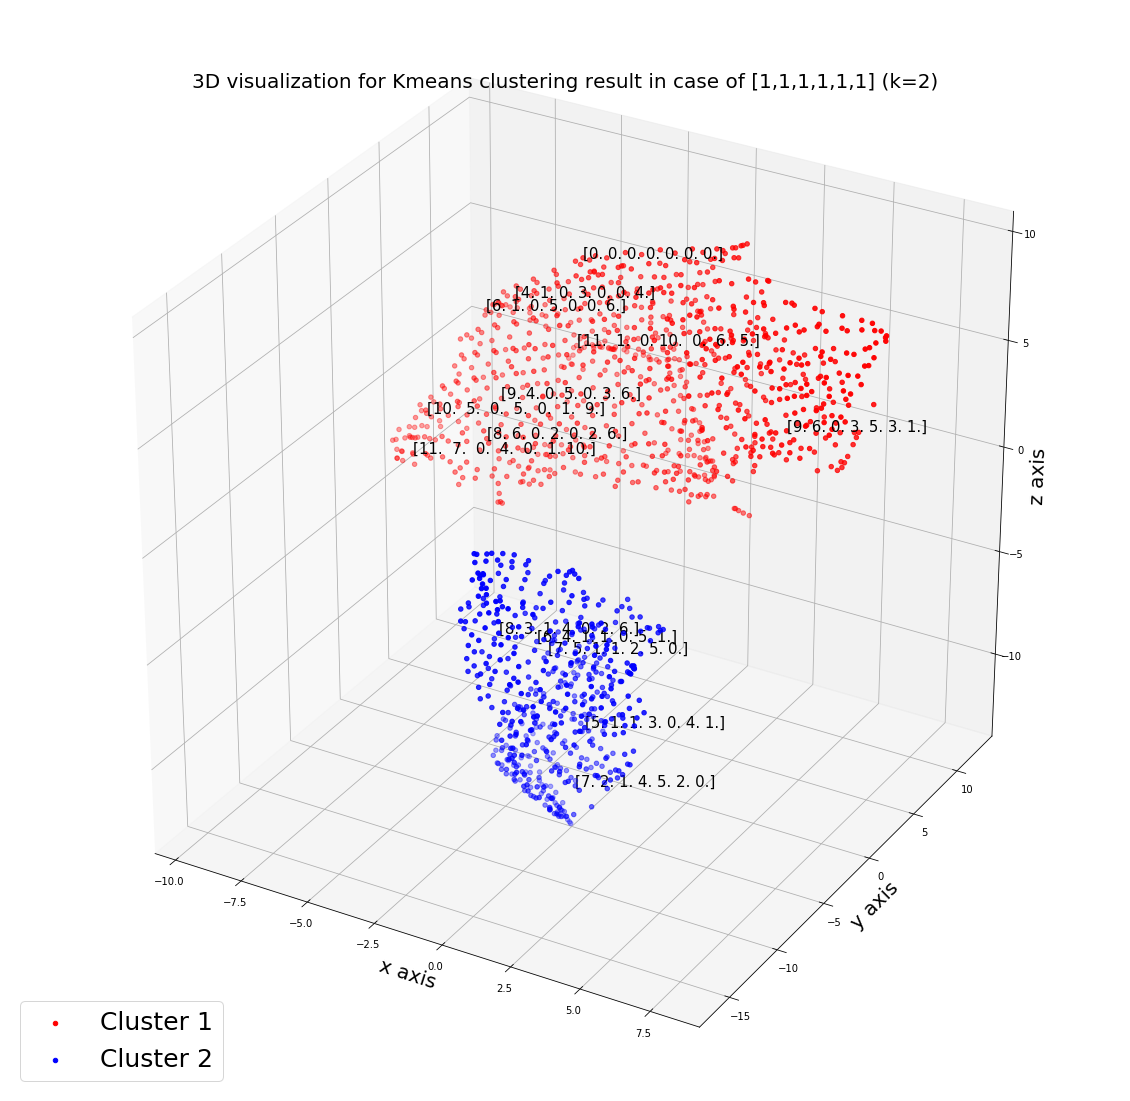

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# tsne = TSNE(n_components = 3)
# data = tsne.fit_transform(matrix1st)
tsne = TSNE(n_components = 3)
data = tsne.fit_transform(matrix1st)
#visualize the results
x = [] 
y = []
z = []
pred = []
x1 = [] 
y1 = []
z1 = []
pred1 = []
x2 = [] 
y2 = []
z2 = []
pred2 = []
x3 = [] 
y3 = []
z3 = []
pred3 = []
x4 = [] 
y4 = []
z4 = []
pred4 = []
for i in range(len(data[:,0])):
    x.append(data[i,0])
    y.append(data[i,1])
    z.append(data[i,2])
    pred.append(kmeans2.labels_[i])
for i in range(len(data[:,0])):
    if kmeans2.labels_[i] == 0:
        x1.append(data[i,0])
        y1.append(data[i,1])
        z1.append(data[i,2])
        pred1.append(kmeans2.labels_[i])
    if kmeans2.labels_[i] == 1:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])
        pred2.append(kmeans2.labels_[i])
    if kmeans2.labels_[i] == 2:
        x3.append(data[i,0])
        y3.append(data[i,1])
        z3.append(data[i,2])
        pred3.append(kmeans2.labels_[i])
    else:
        x4.append(data[i,0])
        y4.append(data[i,1])
        z4.append(data[i,2])
        pred4.append(kmeans2.labels_[i])
# for i in range(len(data[:,0])):
#     if kmeans2.labels_[i] == 0:
#         label1.append((data[i,0]data[i,1]data[i,2]))

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c = 'red',label = 'Cluster 1')
ax.scatter(x2, y2, z2, c = 'blue',label = 'Cluster 2')
# ax.scatter(x3, y3, z3, c = 'yellow',label = 'Cluster 3')
# ax.scatter(x4, y4, z4, c = 'green',label = 'Cluster 4')
for i in range(int(len(data)/100)):
    ax.text(x[100*i], y[100*i], z[100*i],str1[100*i],
             fontsize=15)
plt.title("3D visualization for Kmeans clustering result in case of [1,1,1,1,1,1] (k=2)",fontsize = 20)
ax.set_xlabel('x axis',fontsize = 20)
ax.set_ylabel('y axis',fontsize = 20)
ax.set_zlabel('z axis',fontsize = 20)
ax.legend(fontsize = 25,loc=3)
plt.show()

# Weight[131111]

In [54]:
weight = [1,3,1,1,1,1]

In [55]:
matrix1 = matrix_1st[:,1:]
matrix1

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       ...,
       [ 0.,  0., 16.,  0., 10.,  6.],
       [ 0.,  0., 16.,  0., 11.,  5.],
       [ 0.,  0., 17.,  0., 12.,  5.]])

In [56]:
matrixst1 = matrix1


In [57]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(matrixst1)
matrix1st = scaler1.transform(matrixst1)
matrix1st[:,0]*=weight[0]
matrix1st[:,1]*=weight[1]
matrix1st[:,2]*=weight[2]
matrix1st[:,3]*=weight[3]
matrix1st[:,4]*=weight[4]
matrix1st[:,5]*=weight[5]
kmeans3 = KMeans(n_clusters=2).fit(matrix1st)
print(len(np.unique(kmeans3.labels_)))
print(kmeans3.labels_)
#matrix1 = np.c_[matrix_1st, kmeans1.labels_]

2
[1 1 1 ... 1 1 1]


In [134]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
ch1={}
ch2={}
ch3={}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(matrix1st)
    labels = kmeans.labels_
    ch1[k] = metrics.calinski_harabasz_score(matrix1st,labels)
    ch2[k] = metrics.davies_bouldin_score(matrix1st,labels)
    ch3[k] = metrics.silhouette_score(matrix1st,labels,metric='manhattan')
    print(k, ch1[k])
    print(k, ch2[k])
    print(k, ch3[k])

2 3492.111242185423
2 0.5748245163330375
2 0.5784864676488605
3 2269.0133370452627
3 1.2268201842096793
3 0.3936942735238154
4 1881.727620667366
4 1.0961420286701382
4 0.3890653379946714
5 1690.0578136925863
5 1.316382374030752
5 0.30883025549206133
6 1613.5195183027524
6 1.2325446631164187
6 0.30845622412262413
7 1510.1325024074802
7 1.1461377926790048
7 0.3130698760730292
8 1468.9133744250614
8 1.1605826941346002
8 0.2959107175659006
9 1423.6977502094492
9 1.072235188591665
9 0.2984953314614681
10 1369.2925004710319
10 1.1102212921793215
10 0.28366864926165847
11 1302.9566558520862
11 1.1282151364643835
11 0.2744803366912592
12 1238.5821548134375
12 1.181496303270114
12 0.26634514816352717
13 1193.7228309514453
13 1.188798187920498
13 0.25763082955049355
14 1157.6852305709112
14 1.1997619353880917
14 0.25594638398612857
15 1122.0421687490514
15 1.167962485936954
15 0.2629395588770835
16 1101.8598406783788
16 1.159526151797599
16 0.2573386818726814
17 1077.021312654707
17 1.1770544121

In [95]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
ch={}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(matrix1st)
    labels = kmeans.labels_
#    ch[k] = metrics.calinski_harabaz_score(X3, labels)
    #ch[k] = metrics.silhouette_score(X3, labels)
    ch[k] = metrics.davies_bouldin_score(X3,labels)
    print(k, ch[k])

2 1.290607346009355
3 0.9556258238319785
4 0.9628097276909899
5 1.1136360150573839
6 1.0000331333693386
7 1.1314011930862393
8 1.160847778237602
9 1.5432016941609474
10 1.3802458036092777
11 1.3825790547899393
12 1.3639069416998932
13 1.318969314680639
14 1.3772426688258264
15 1.4491654695291443
16 1.518657491410301
17 1.6880434704956733
18 2.0053178887890573
19 1.8557204469777637


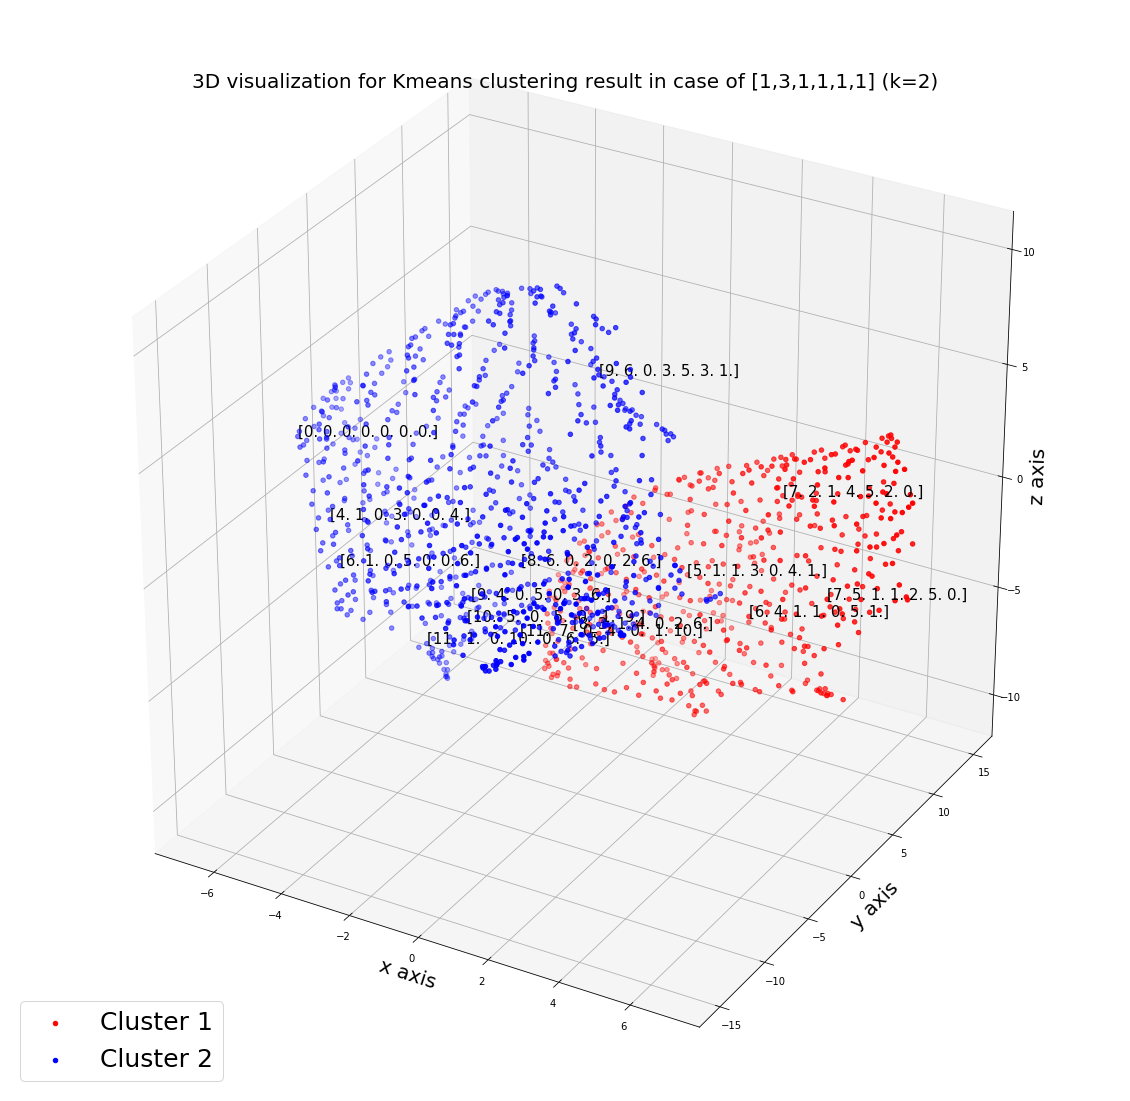

In [58]:
from mpl_toolkits.mplot3d import Axes3D

# tsne = TSNE(n_components = 3)
# data = tsne.fit_transform(matrix1st)
tsne = TSNE(n_components = 3)
data = tsne.fit_transform(matrix1st)
#visualize the results
x = [] 
y = []
z = []
pred = []
x1 = [] 
y1 = []
z1 = []
pred1 = []
x2 = [] 
y2 = []
z2 = []
pred2 = []
x3 = [] 
y3 = []
z3 = []
pred3 = []
x4 = [] 
y4 = []
z4 = []
pred4 = []
for i in range(len(data[:,0])):
    x.append(data[i,0])
    y.append(data[i,1])
    z.append(data[i,2])
    pred.append(kmeans3.labels_[i])
for i in range(len(data[:,0])):
    if kmeans3.labels_[i] == 0:
        x1.append(data[i,0])
        y1.append(data[i,1])
        z1.append(data[i,2])
        pred1.append(kmeans3.labels_[i])
    if kmeans3.labels_[i] == 1:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])
        pred2.append(kmeans3.labels_[i])
    if kmeans3.labels_[i] == 2:
        x3.append(data[i,0])
        y3.append(data[i,1])
        z3.append(data[i,2])
        pred3.append(kmeans3.labels_[i])
    else:
        x4.append(data[i,0])
        y4.append(data[i,1])
        z4.append(data[i,2])
        pred4.append(kmeans3.labels_[i])
# for i in range(len(data[:,0])):
#     if kmeans1.labels_[i] == 0:
#         label1.append((data[i,0]data[i,1]data[i,2]))

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c = 'red',label = 'Cluster 1')
ax.scatter(x2, y2, z2, c = 'blue',label = 'Cluster 2')
# ax.scatter(x3, y3, z3, c = 'yellow',label = 'Cluster 3')
# ax.scatter(x4, y4, z4, c = 'green',label = 'Cluster 4')
for i in range(int(len(data)/100)):
    ax.text(x[100*i], y[100*i], z[100*i],str1[100*i],
             fontsize=15)
plt.title("3D visualization for Kmeans clustering result in case of [1,3,1,1,1,1] (k=2)",fontsize = 20)
ax.set_xlabel('x axis',fontsize = 20)
ax.set_ylabel('y axis',fontsize = 20)
ax.set_zlabel('z axis',fontsize = 20)
ax.legend(fontsize = 25,loc=3)
plt.show()